# <font size="4.5"><b>Import Library<b></font>


In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from colour import Color
%matplotlib inline
plt.style.use('bmh')
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [19]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 12, 6
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

# <font size="4.5"><b>Initial EDA<b></font>

In [20]:
# Import dataset
data = pd.read_csv("D://diabetes.csv")
data.sample(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
261,3,141,0,0,0,30.00,0.76,27,1
581,6,109,60,27,0,25.00,0.21,27,0
342,1,0,68,35,0,32.00,0.39,22,0
711,5,126,78,27,22,29.60,0.44,40,0
745,12,100,84,33,105,30.00,0.49,46,0
714,3,102,74,0,0,29.50,0.12,32,0
36,11,138,76,0,0,33.20,0.42,35,0
622,6,183,94,0,0,40.80,1.46,45,0
688,1,140,74,26,180,24.10,0.83,23,0
317,3,182,74,0,0,30.50,0.34,29,1


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [22]:
# Descriptive statistics
data[data.columns[:-1]].describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00
mean,3.85,120.89,69.11,20.54,79.80,31.99,0.47,33.24
std,3.37,31.97,19.36,15.95,115.24,7.88,0.33,11.76
min,0.00,0.00,0.00,0.00,0.00,0.00,0.08,21.00
25%,1.00,99.00,62.00,0.00,0.00,27.30,0.24,24.00
50%,3.00,117.00,72.00,23.00,30.50,32.00,0.37,29.00
75%,6.00,140.25,80.00,32.00,127.25,36.60,0.63,41.00
max,17.00,199.00,122.00,99.00,846.00,67.10,2.42,81.00


Insight acquired:
1. The difference between the mean and median values for each feature is relatively low except for the insulin column, so there is a possibility of skewness in its distribution.
2. The average of: patient's age is 33 year old, blood pressure 69 (normal), BMI 31.9 (obesity), glucose concentration 120,89 (normal)

In [23]:
# Check null data
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

There is no null data found using isnull function, but from the previous analysis, we know that null value is represented by 0 number. Hence, the missing value handling should be done.

# <font size="4.5"><b>Data Cleaning<b></font>

## <font size="3.5">Missing Value Handling</font>

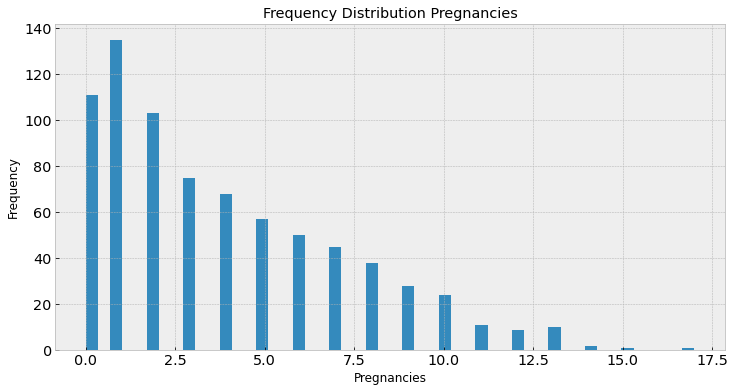

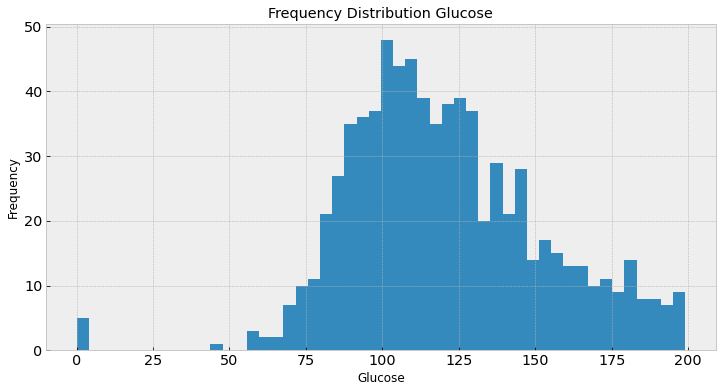

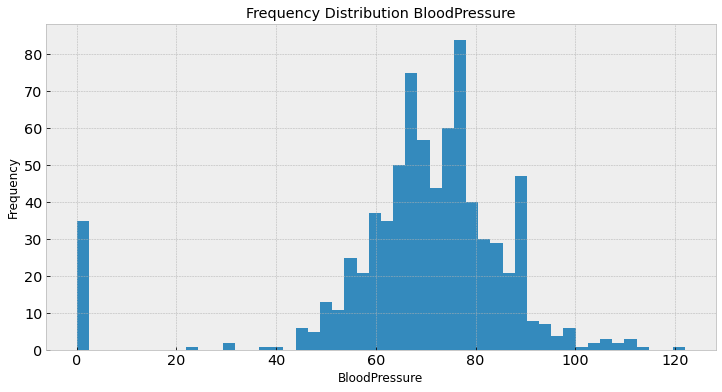

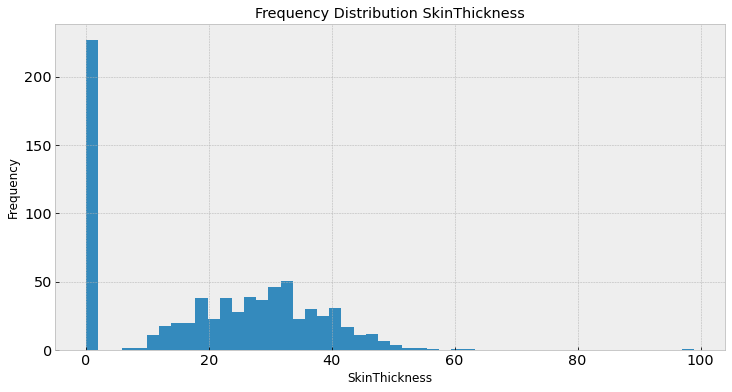

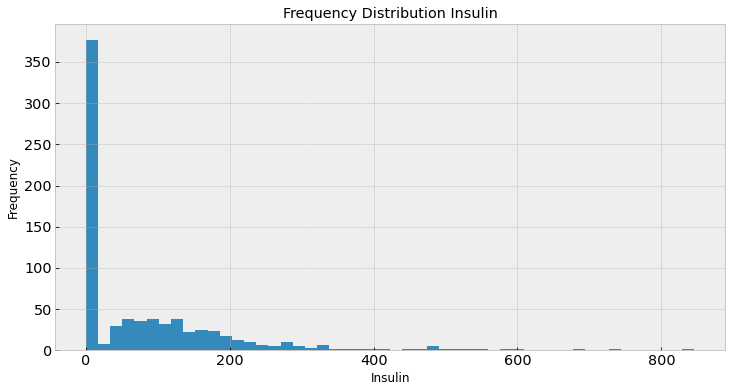

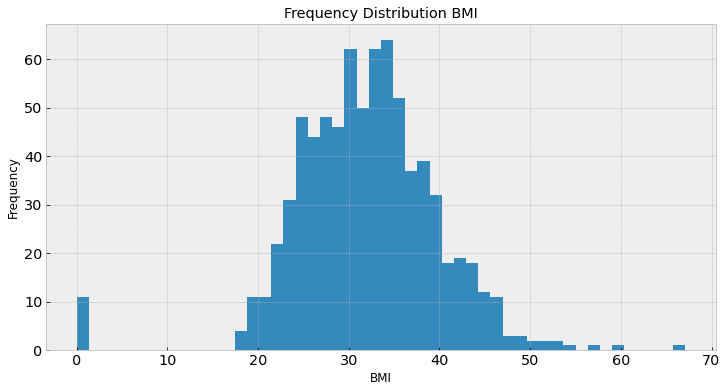

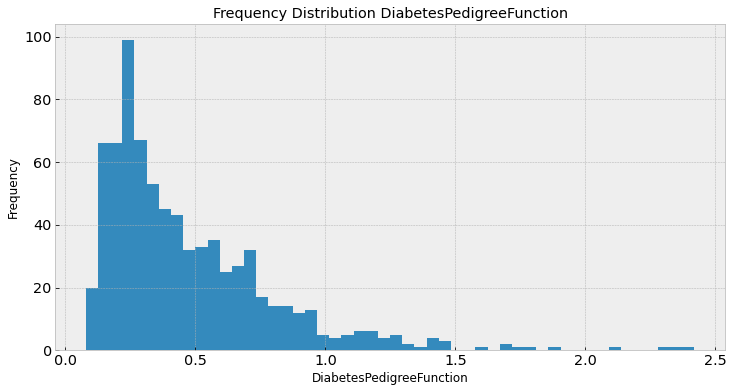

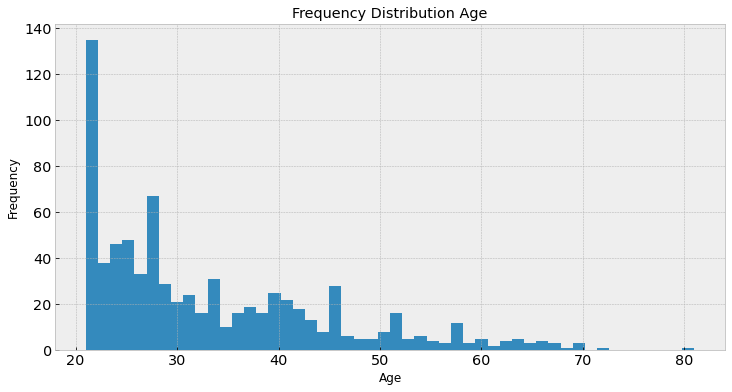

In [24]:
# Visualize null data on each column
fitur = data.columns[:-1]
for col in fitur:
    plt.hist(data[col], bins = 50)
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.title(f"Frequency Distribution {col}")
    plt.show()

The visualization shows only Diabetes Pedigree Function and Age column that contains no null value

In [25]:
# Null value percentage
print("               Null Value \t Percentage")
print("_________________________________________________")

fitur = data.columns[:-3]
for col in fitur:
    if not col == "BMI":
        jumlah_null = (data[col]==0).sum()
        persentase = int(round((jumlah_null / len(data))*100))
        print(col, "\t:", jumlah_null, "\t\t", persentase)
    else:
        jumlah_null = (data[col]==0).sum()
        persentase = int(round((jumlah_null / len(data))*100))
        print(col, "\t\t:", jumlah_null, "\t\t", persentase)

               Null Value 	 Percentage
_________________________________________________
Pregnancies 	: 111 		 14
Glucose 	: 5 		 1
BloodPressure 	: 35 		 5
SkinThickness 	: 227 		 30
Insulin 	: 374 		 49
BMI 		: 11 		 1


Glucose, BloodPressure, and BMI column contain less than 10% of missing value, thus we can just drop them

In [26]:
drop_col = ['Glucose', 'BloodPressure', 'BMI']
for col in drop_col:
    data.drop(data.loc[data[col]==0].index, inplace=True)

In [27]:
for col in fitur:
    if not col == "BMI":
        jumlah_null = (data[col]==0).sum()
        persentase = int(round((jumlah_null / len(data))*100))
        print(col, "\t:", jumlah_null, "\t\t", persentase)
    else:
        jumlah_null = (data[col]==0).sum()
        persentase = int(round((jumlah_null / len(data))*100))
        print(col, "\t\t:", jumlah_null, "\t\t", persentase)

Pregnancies 	: 99 		 14
Glucose 	: 0 		 0
BloodPressure 	: 0 		 0
SkinThickness 	: 192 		 27
Insulin 	: 332 		 46
BMI 		: 0 		 0


For the rest of features that contain more than 10% missing value, we will do the imputation with median value

In [28]:
from sklearn.impute import SimpleImputer
X = data.iloc[:,:-1]
y = data.iloc[:,-1]
imputer = SimpleImputer(missing_values=0, strategy='median')
X = imputer.fit_transform(X)
X = pd.DataFrame(X,columns=data.columns[:-1])
y = pd.DataFrame(y,columns=["Outcome"])
y.index = X.index
data = pd.concat([X,y], axis=1)

In [29]:
X.shape

(724, 8)

In [30]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.00,148.00,72.00,35.00,125.50,33.60,0.63,50.00,1
1,1.00,85.00,66.00,29.00,125.50,26.60,0.35,31.00,0
2,8.00,183.00,64.00,29.00,125.50,23.30,0.67,32.00,1
3,1.00,89.00,66.00,23.00,94.00,28.10,0.17,21.00,0
4,4.00,137.00,40.00,35.00,168.00,43.10,2.29,33.00,1
...,...,...,...,...,...,...,...,...,...
719,10.00,101.00,76.00,48.00,180.00,32.90,0.17,63.00,0
720,2.00,122.00,70.00,27.00,125.50,36.80,0.34,27.00,0
721,5.00,121.00,72.00,23.00,112.00,26.20,0.24,30.00,0
722,1.00,126.00,60.00,29.00,125.50,30.10,0.35,47.00,1


In [31]:
# Persentase nilai null
print("                Null Values \t Percentage")
print("_________________________________________________")

fitur = data.columns[:-3]
for col in fitur:
    if not col == "BMI":
        jumlah_null = (data[col]==0).sum()
        persentase = (jumlah_null / len(data))*100
        print(col, "\t:", jumlah_null, "\t\t", persentase)
    else:
        jumlah_null = (data[col]==0).sum()
        persentase = (jumlah_null / len(data))*100
        print(col, "\t\t:", jumlah_null, "\t\t", persentase)

                Null Values 	 Percentage
_________________________________________________
Pregnancies 	: 0 		 0.0
Glucose 	: 0 		 0.0
BloodPressure 	: 0 		 0.0
SkinThickness 	: 0 		 0.0
Insulin 	: 0 		 0.0
BMI 		: 0 		 0.0


No missing value found already

## <font size="3.5">Duplicate Value Handling</font>

In [32]:
# Cek data duplikat

data.duplicated().sum()

0

The duplicated data comes from the imputation done before, thus we will leave them out

# <font size="4.5"><b>Univariate Analysis<b></font>

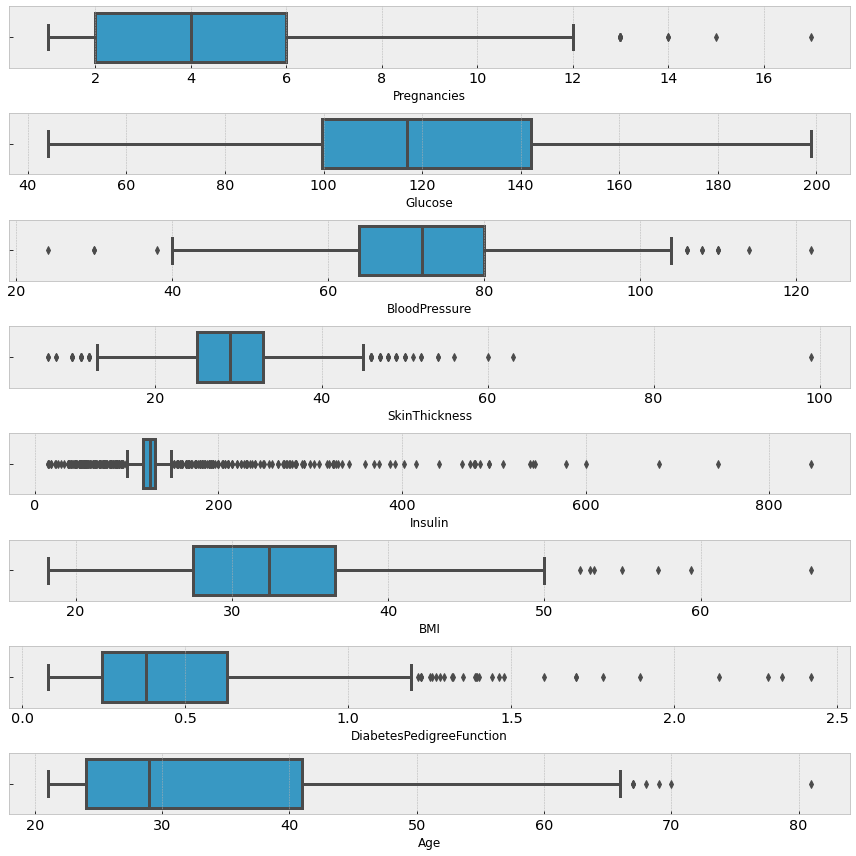

In [33]:
# Outliers check
fitur = data.columns[:-1]
plt.figure(figsize=(12,12))
for i in range(0, len(fitur)):
    plt.subplot(8, 1, i+1)
    sns.boxplot(data[fitur[i]],color="#21A1DA")
    plt.tight_layout()

Terdapat outlier pada hampir semua kolom kecuali Glucose, dan kebanyakan skew ke arah positif

In [34]:
# Find multiple outliers
from collections import Counter

def deteksi_outliers(df,fitur):
    index_outlier = []
    
    for col in fitur:
        if not col == "Glucose":
            Q1 = data[col].quantile(0.25)
            Q3 = data[col].quantile(0.75)
            IQR = Q3 - Q1
            low_limit = Q1 - (IQR * 1.5)
            high_limit = Q3 + (IQR * 1.5)

            outlier = data[(data[col] < low_limit) | (data[col] > high_limit)].index
            index_outlier.extend(outlier)
            
    index_outlier= Counter(index_outlier)
    mult_outlier = list(i for i, v in index_outlier.items() if v > 2)
    
    return mult_outlier

In [35]:
data.loc[deteksi_outliers(data, ['Pregnancies', 'Glucose','BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
117,1.00,88.00,30.00,42.00,99.00,55.00,0.50,26.00,1
167,4.00,129.00,110.00,46.00,130.00,67.10,0.32,26.00,1
622,8.00,167.00,106.00,46.00,231.00,37.60,0.17,43.00,1
36,4.00,111.00,72.00,47.00,207.00,37.10,1.39,56.00,1
347,3.00,173.00,82.00,48.00,465.00,38.40,2.14,25.00,1
418,4.00,180.00,78.00,63.00,14.00,59.40,2.42,25.00,1


There are 6 rows having more than 2 outlier

In [36]:
# Drop row that contains multiple outlier
data = data.drop(deteksi_outliers(data, ['Pregnancies', 'Glucose','BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']), axis=0).reset_index(drop=True)

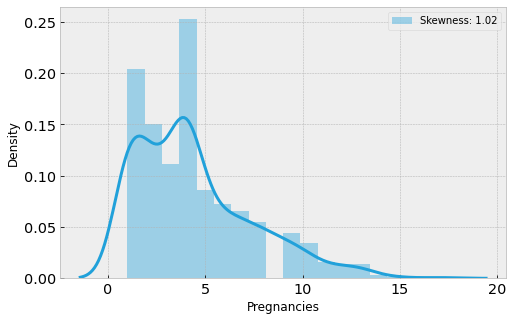

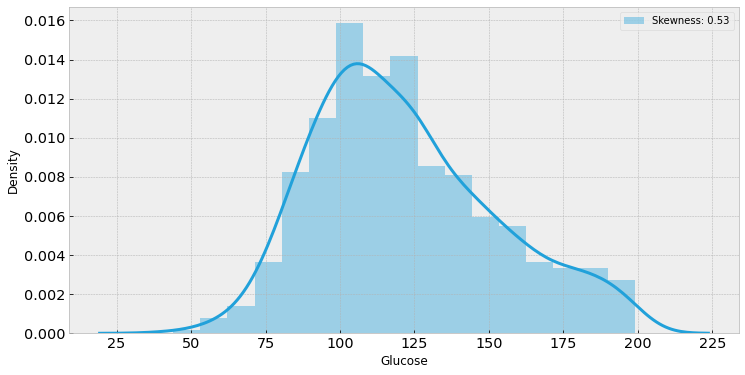

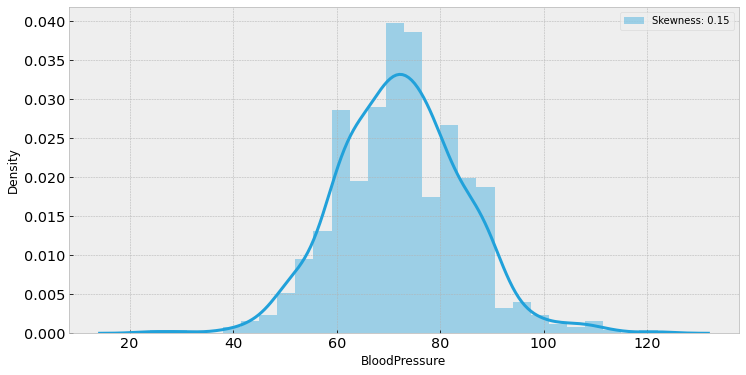

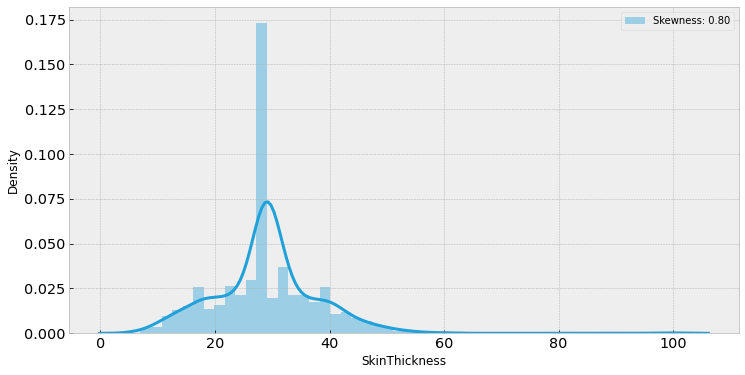

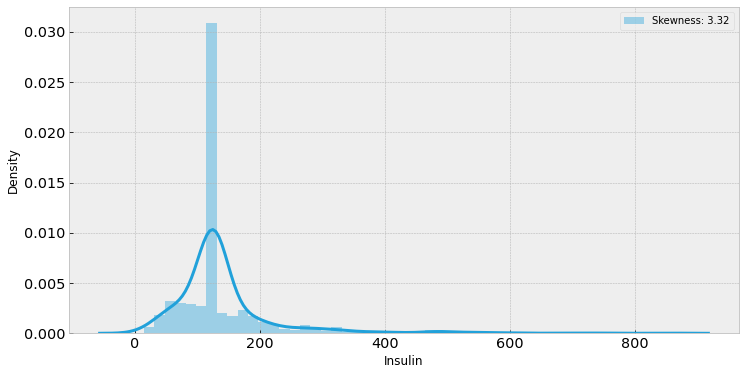

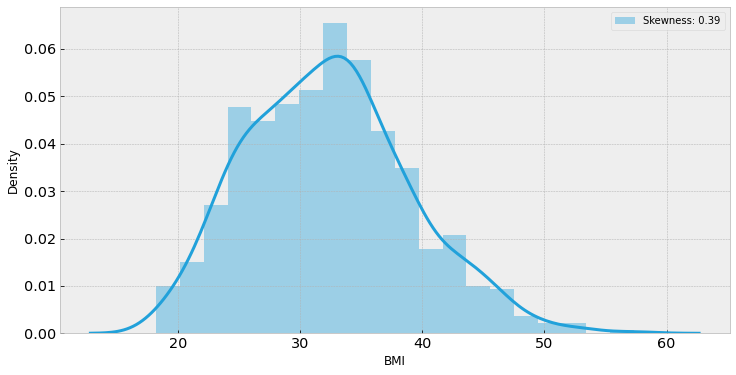

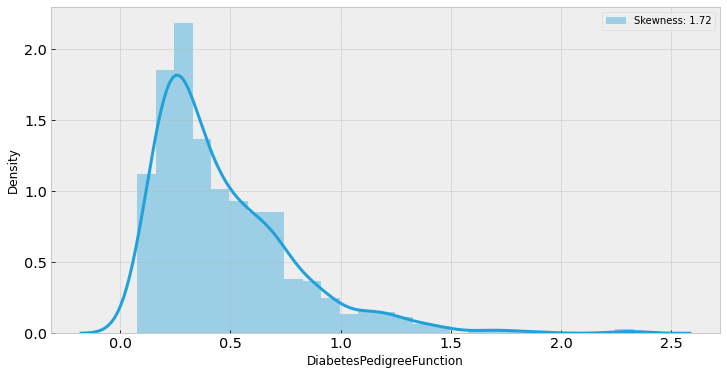

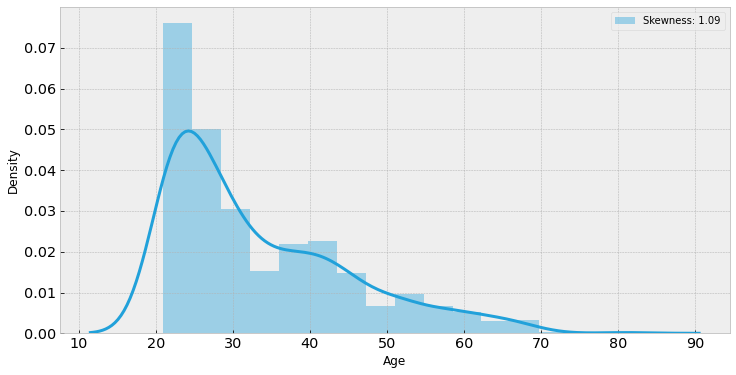

In [37]:
# Check the skewness of each features
plt.figure(figsize=(8,5))
for i in range(0, len(fitur)):
    p = sns.distplot(data[fitur[i]],color="#21A1DA",label="Skewness: %.2f"%(data[fitur[i]].skew()))
    p = p.legend(loc='best')
    plt.show()

The tolerable value skewness for normal distribution is around -2 to 2, hence we need to do a transformation on the insulin column

In [38]:
data["Insulin"]

0     125.50
1     125.50
2     125.50
3      94.00
4     168.00
       ...  
713   180.00
714   125.50
715   112.00
716   125.50
717   125.50
Name: Insulin, Length: 718, dtype: float64

In [39]:
data['Insulin'] = np.log(data["Insulin"])
data['Insulin'].skew()

-0.11627885181803059

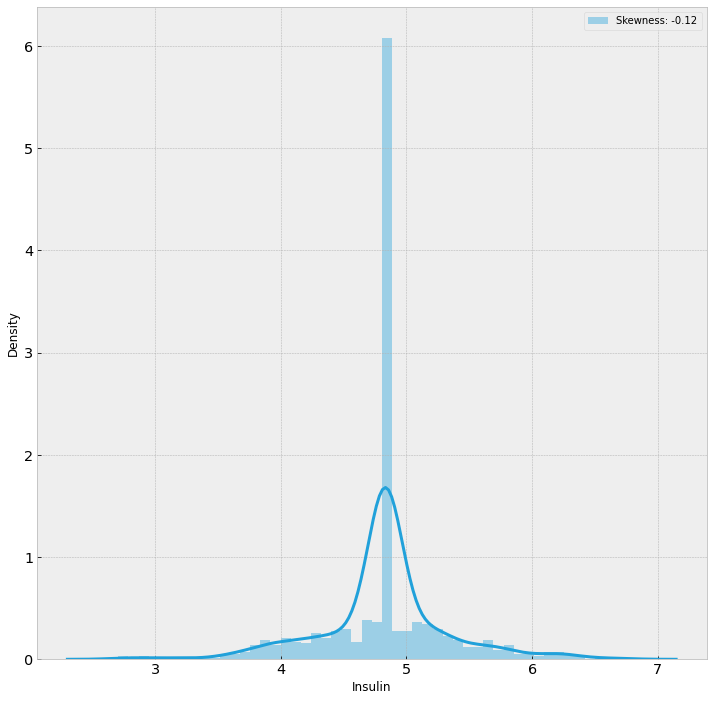

In [40]:
plt.figure(figsize=(12,12))
p = sns.distplot(data['Insulin'],color="#21A1DA",label="Skewness: %.2f"%(data['Insulin'].skew()))
p = p.legend(loc='best')
plt.show()

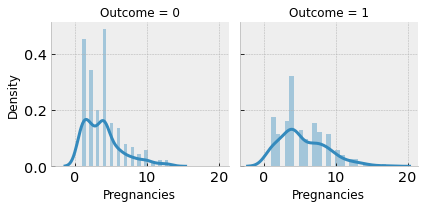

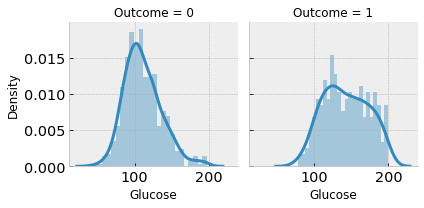

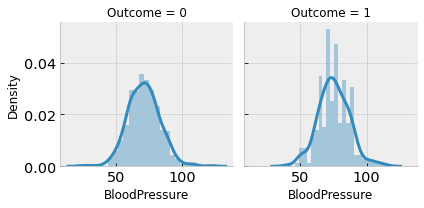

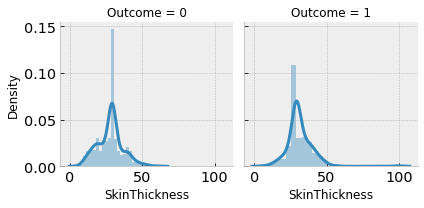

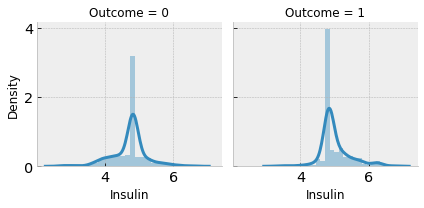

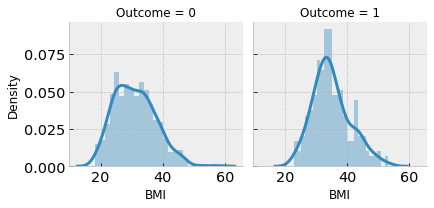

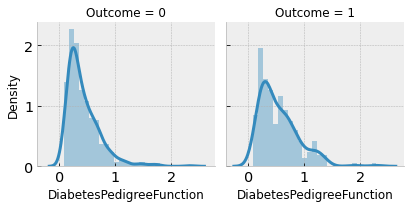

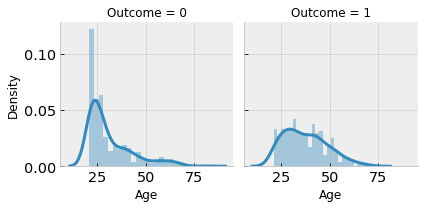

In [41]:
# Check the distribution based on each outcome
for col in X:
    m = sns.FacetGrid(data, col = "Outcome")
    m.map(sns.distplot, col, bins= 25)        
    plt.show()

In [42]:
# Scale the data using standard scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
for col in data.columns[:-1]:
    data[col] = scaler.fit_transform(data[col].values.reshape(len(data), 1))

In [43]:
data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.53,0.86,-0.03,0.68,0.02,0.19,0.50,1.42,1
1,-1.14,-1.20,-0.52,0.00,0.02,-0.86,-0.37,-0.20,0
2,1.20,2.00,-0.69,0.00,0.02,-1.36,0.64,-0.11,1
3,-1.14,-1.07,-0.52,-0.67,-0.55,-0.64,-0.95,-1.05,0
4,-0.14,0.50,-2.66,0.68,0.60,1.62,5.73,-0.03,1


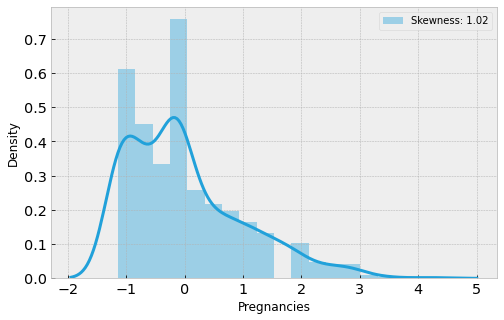

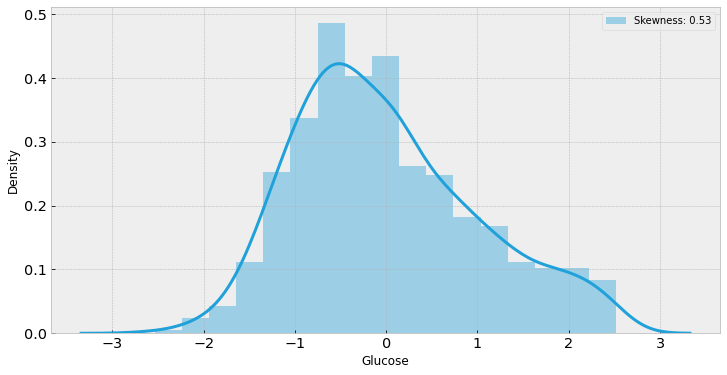

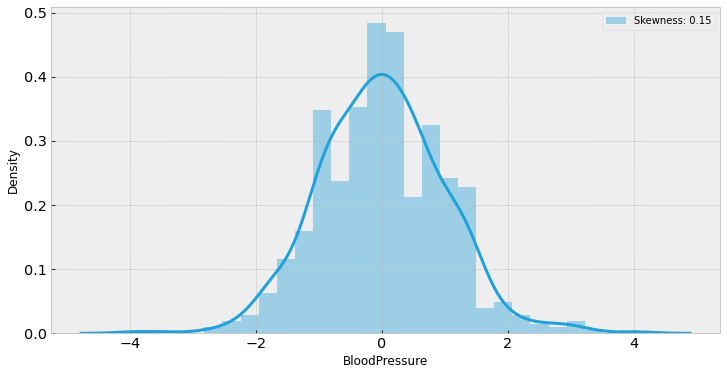

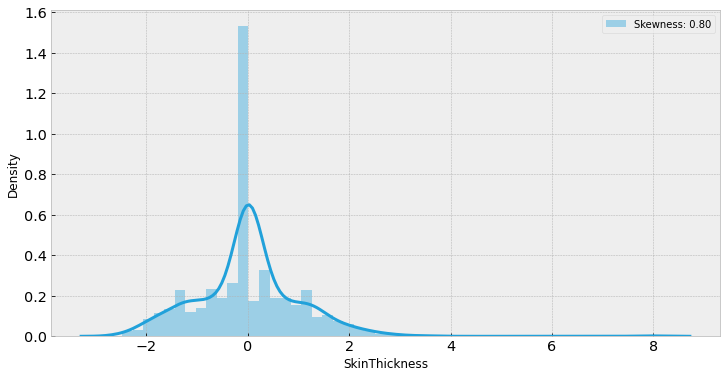

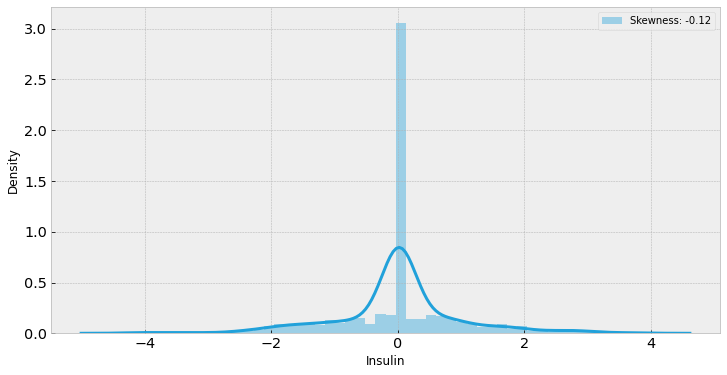

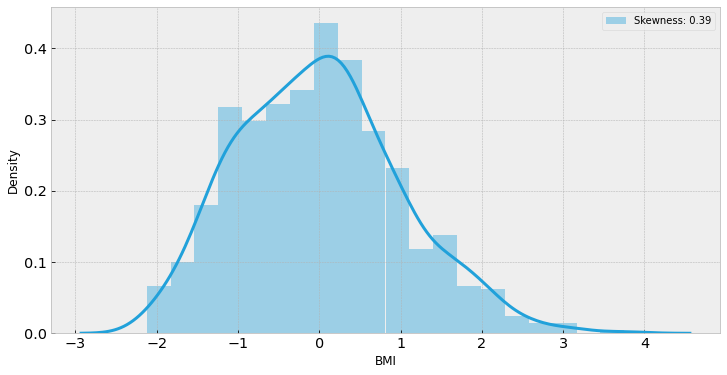

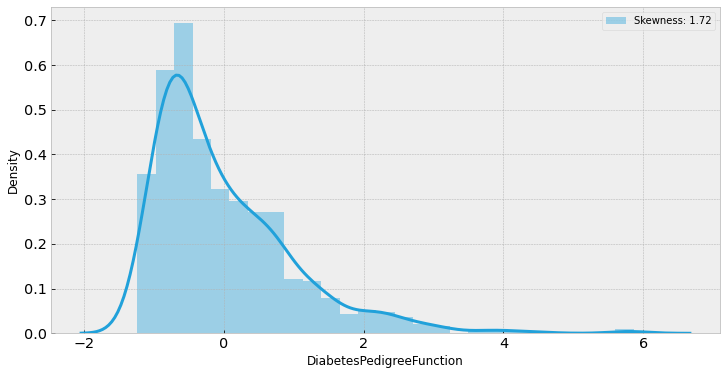

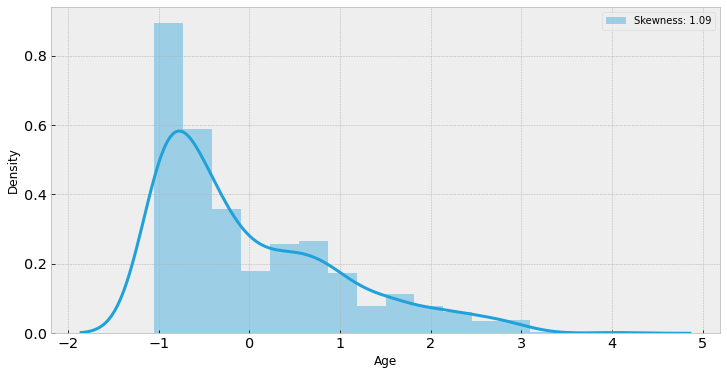

In [44]:
# Check the skewness
plt.figure(figsize=(8,5))
for i in range(0, len(fitur)):
    p = sns.distplot(data[fitur[i]],color="#21A1DA",label="Skewness: %.2f"%(data[fitur[i]].skew()))
    p = p.legend(loc='best')
    plt.show()

# <font size="4.5"><b>Multivariate Analysis<b></font>

<AxesSubplot:>

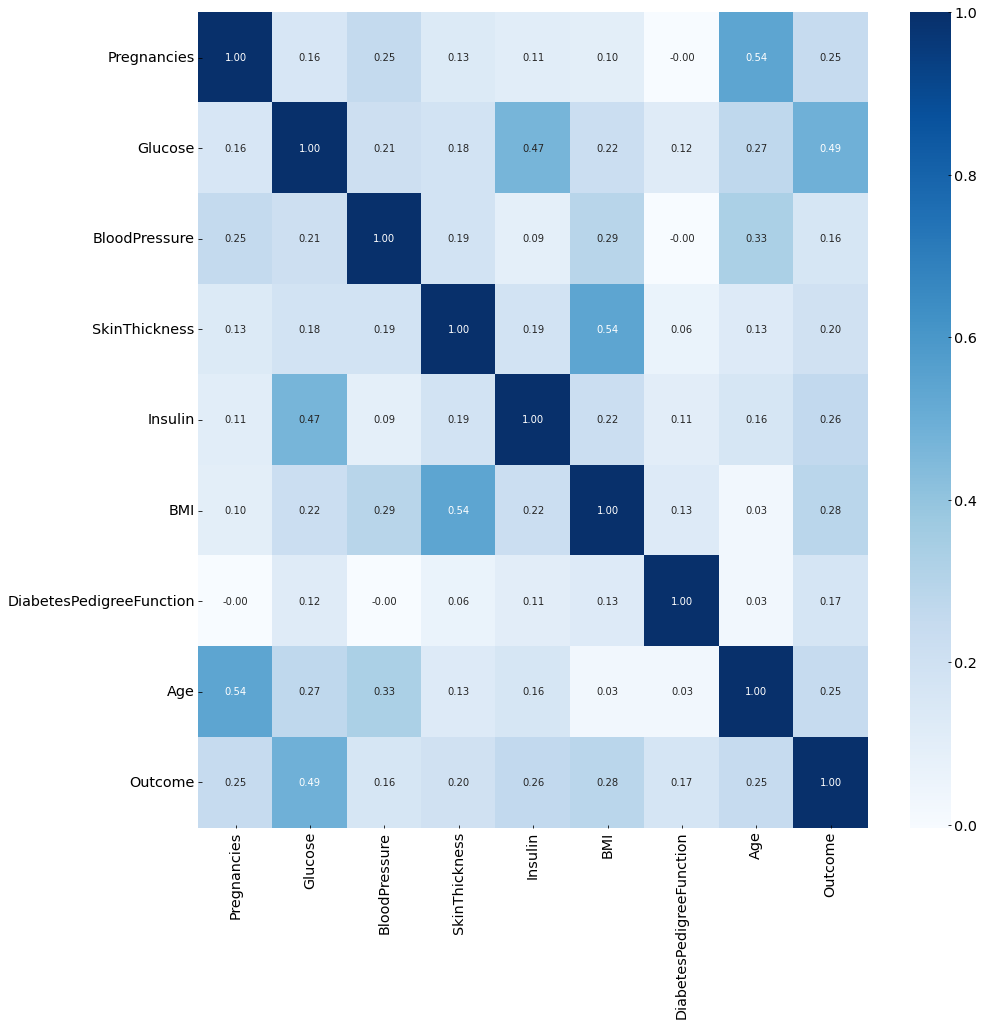

In [45]:
# Check the correlation between features
plt.figure(figsize=(15, 15))
sns.heatmap(data.corr(), cmap='Blues', annot=True, fmt='.2f')

# <font size="4.5"><b>Machine Learning Model<b></font>

In [46]:
data['Outcome'] = data['Outcome'].astype('category')
X_scaled = data[data.columns[:-1]]
y = data['Outcome']

In [47]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.53,0.86,-0.03,0.68,0.02,0.19,0.50,1.42,1
1,-1.14,-1.20,-0.52,0.00,0.02,-0.86,-0.37,-0.20,0
2,1.20,2.00,-0.69,0.00,0.02,-1.36,0.64,-0.11,1
3,-1.14,-1.07,-0.52,-0.67,-0.55,-0.64,-0.95,-1.05,0
4,-0.14,0.50,-2.66,0.68,0.60,1.62,5.73,-0.03,1


In [48]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

In [57]:
# Use lazypredict to fit all sklearn classifier model
from lazypredict.Supervised import LazyClassifier

clf = LazyClassifier(predictions=True)
models, predictions = clf.fit(x_train, x_test, y_train, y_test)

 86%|████████▌ | 37/43 [00:05<00:00,  9.03it/s]

[19:13:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


100%|██████████| 43/43 [00:06<00:00,  6.22it/s]


In [58]:
models,predictions

(                                Accuracy  Balanced Accuracy  ROC AUC  \
 Model                                                                  
 GradientBoostingClassifier          0.84               0.81     0.81   
 NearestCentroid                     0.78               0.80     0.80   
 RandomForestClassifier              0.83               0.79     0.79   
 QuadraticDiscriminantAnalysis       0.81               0.77     0.77   
 CalibratedClassifierCV              0.82               0.77     0.77   
 RidgeClassifierCV                   0.82               0.77     0.77   
 RidgeClassifier                     0.82               0.77     0.77   
 LinearSVC                           0.81               0.76     0.76   
 LinearDiscriminantAnalysis          0.81               0.76     0.76   
 LogisticRegression                  0.81               0.76     0.76   
 GaussianNB                          0.79               0.76     0.76   
 HistGradientBoostingClassifier      0.78          

As shown above, Gradient Boosting Classifier has the highest accuracy and f1 score. We can further improve this score using hyperparameters tuning.

In [60]:
# Hyperparameters tuning
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()
params = {
    "n_estimators":[5,50,250,500],
    "max_depth":[1,3,5,7,9],
    "learning_rate":[0.01,0.1,1,10,100]
}

# Gridsearch
clf = GridSearchCV(gbc, params, cv=5)

best_model = clf.fit(X_scaled,y)

print('Best n_estimators:', best_model.best_estimator_.get_params()['n_estimators'])
print('Best max_depth:', best_model.best_estimator_.get_params()['max_depth'])
print('Best learning_rate:', best_model.best_estimator_.get_params()['learning_rate'])

Best n_estimators: 50
Best max_depth: 3
Best learning_rate: 0.1


In [61]:
# Create new model using tuned hyperparameters
y_pred = best_model.predict(x_test)

# Classification Report
print(classification_report(y_test,y_pred))

# ROC AUC
print("ROC AUC Score: ")
roc_auc_score(y_test,y_pred)

              precision    recall  f1-score   support

           0       0.90      0.93      0.91        98
           1       0.84      0.78      0.81        46

    accuracy                           0.88       144
   macro avg       0.87      0.86      0.86       144
weighted avg       0.88      0.88      0.88       144

ROC AUC Score: 


0.8555900621118012

In [62]:
# Cross validation
cv_score = cross_val_score(best_model, X_scaled, y, cv=5)

print(cv_score)
print('cv_score mean:{}'.format(np.mean(cv_score))) 

[0.79166667 0.72222222 0.76388889 0.82517483 0.74825175]
cv_score mean:0.7702408702408702
